In [1]:
# Importing all the Necessary Modules Needed
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import seaborn
import tensorflow_hub as hub
from tensorflow.keras import layers
import zipfile

In [2]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-06-29 10:56:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  22.7MB/s    in 24s     

2024-06-29 10:57:00 (20.7 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [3]:
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [4]:
unzip_data("/content/10_food_classes_all_data.zip")

In [5]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Use only GPU 0

In [6]:
# Iterating through the directories of the folder
for dirpath, dirname, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 10 directories and 0 imag

In [7]:
# Initializing the training and testing directories
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [8]:
# Creating a image data generator to preprocess the images
IMAGE_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size = IMAGE_SIZE,
    label_mode = "categorical",
    batch_size = 32
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size = IMAGE_SIZE,
    label_mode = "categorical",
    batch_size = 32,
    shuffle = False
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
checkpoint_filepath = '/tmp/ckpt/checkpoint.weights.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
    initial_value_threshold=None
)

In [10]:
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomRotation(0.2),
        layers.RandomFlip("horizontal"),
        layers.RandomHeight(0.2),
        layers.RandomWidth(0.2),
    ] , name = "data_augmentation_layer"
)

In [11]:
initial_epochs = 10

In [12]:
base_model_1 = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet")
base_model_1.trainable = False

inputs_1 = layers.Input(shape=(224, 224, 3), name="input_layer")
x_1 = data_augmentation(inputs_1)
x_1 = base_model_1(x_1, training=False)
x_1 = layers.GlobalAveragePooling2D()(x_1)
outputs_1 = layers.Dense(10, activation="softmax")(x_1)

model_1 = tf.keras.Model(inputs=inputs_1, outputs=outputs_1)
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_1 = model_1.fit( train_data,
          epochs= initial_epochs,
           steps_per_epoch= len(train_data),
          validation_data= test_data,
          validation_steps= len(test_data),
            callbacks = [model_checkpoint_callback]
         )

16705208/16705208 [==============================] - 2s 0us/step
Epoch 1/10
235/235 [==============================] - 160s 634ms/step - loss: 0.9563 - accuracy: 0.7197 - val_loss: 0.4347 - val_accuracy: 0.8808
Epoch 2/10
235/235 [==============================] - 102s 433ms/step - loss: 0.5638 - accuracy: 0.8283 - val_loss: 0.3567 - val_accuracy: 0.8912
Epoch 3/10
235/235 [==============================] - 87s 368ms/step - loss: 0.4997 - accuracy: 0.8435 - val_loss: 0.3290 - val_accuracy: 0.9008
Epoch 4/10
235/235 [==============================] - 78s 329ms/step - loss: 0.4669 - accuracy: 0.8527 - val_loss: 0.3135 - val_accuracy: 0.9008
Epoch 5/10
235/235 [==============================] - 75s 318ms/step - loss: 0.4356 - accuracy: 0.8625 - val_loss: 0.3084 - val_accuracy: 0.9052
Epoch 6/10
235/235 [==============================] - 65s 277ms/step - loss: 0.3982 - accuracy: 0.8764 - val_loss: 0.2973 - val_accuracy: 0.9072
Epoch 7/10
235/235 [==============================] - 64s 272ms

In [13]:
feature_extraction_model = model_1.evaluate(test_data)

79/79 [==============================] - 5s 64ms/step - loss: 0.2764 - accuracy: 0.9132


In [14]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (S  (None, None, None, 3)     0         
 equential)                                                      
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                             

In [15]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


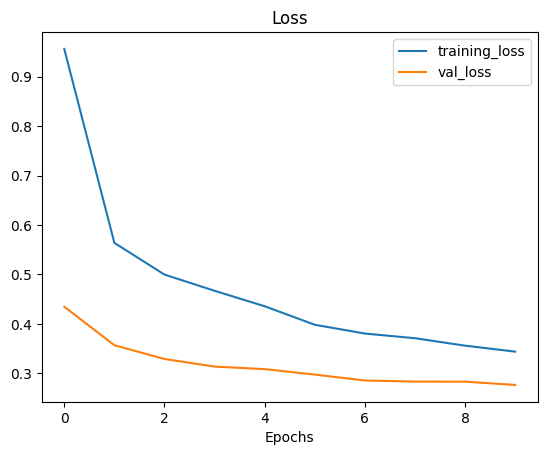

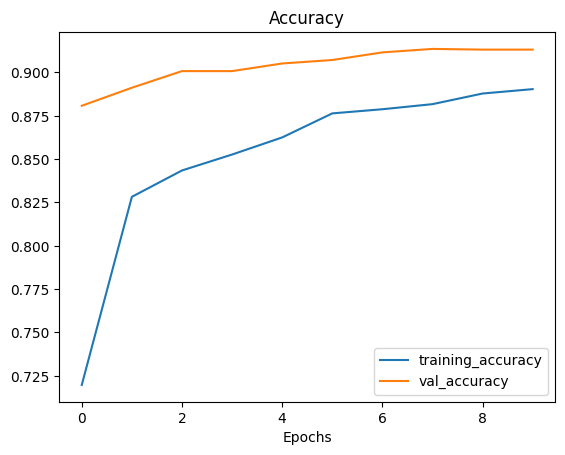

In [16]:
plot_loss_curves(history_1)

In [17]:
base_model_1.trainable = True

In [18]:
for layer in (base_model_1.layers[:-10]):
    layer.trainbale = False

In [19]:
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=["accuracy"]
)

In [20]:
fine_tuning_epochs = 20
history_2 = model_1.fit( train_data,
          epochs= fine_tuning_epochs,
           steps_per_epoch= len(train_data),
          validation_data= test_data,
          validation_steps= len(test_data),
          initial_epoch = history_1.epoch[-1],
          callbacks = [model_checkpoint_callback]
         )

Epoch 10/20
235/235 [==============================] - 403s 2s/step - loss: 0.3728 - accuracy: 0.8748 - val_loss: 0.2676 - val_accuracy: 0.9148
Epoch 11/20
235/235 [==============================] - 265s 1s/step - loss: 0.2368 - accuracy: 0.9264 - val_loss: 0.2418 - val_accuracy: 0.9220
Epoch 12/20
235/235 [==============================] - 235s 1s/step - loss: 0.1612 - accuracy: 0.9456 - val_loss: 0.2275 - val_accuracy: 0.9292
Epoch 13/20
235/235 [==============================] - 211s 897ms/step - loss: 0.1116 - accuracy: 0.9648 - val_loss: 0.2576 - val_accuracy: 0.9240
Epoch 14/20
235/235 [==============================] - 194s 824ms/step - loss: 0.0979 - accuracy: 0.9679 - val_loss: 0.2605 - val_accuracy: 0.9252
Epoch 15/20
235/235 [==============================] - 176s 749ms/step - loss: 0.0721 - accuracy: 0.9761 - val_loss: 0.2439 - val_accuracy: 0.9360
Epoch 16/20
235/235 [==============================] - 170s 720ms/step - loss: 0.0600 - accuracy: 0.9791 - val_loss: 0.2544 - v

In [21]:
fine_tuned_model = model_1.evaluate(test_data)
fine_tuned_model

79/79 [==============================] - 6s 79ms/step - loss: 0.2661 - accuracy: 0.9340


[0.26611143350601196, 0.9340000152587891]

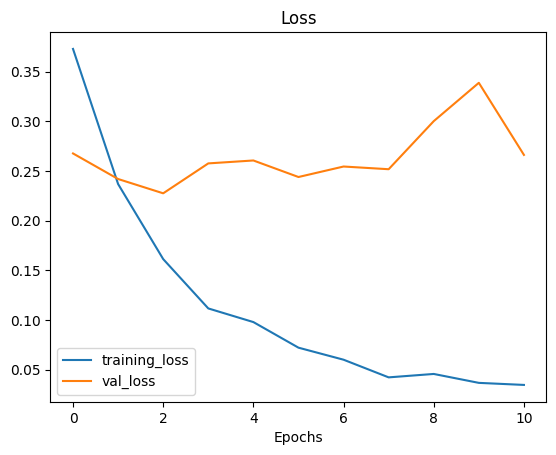

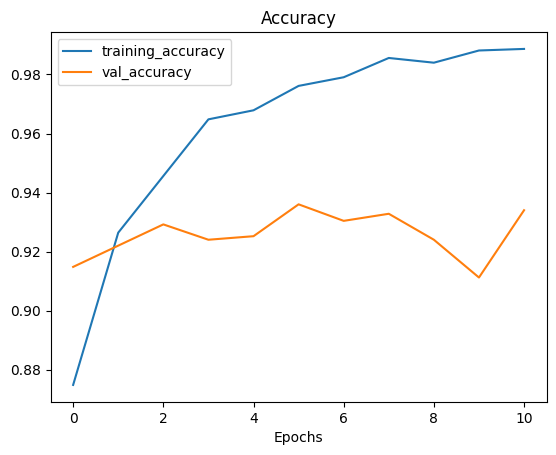

In [22]:
plot_loss_curves(history_2)

In [23]:
def compare_historys(original_history, new_history, initial_epochs=10):
    """
    Compares two TensorFlow model History objects.

    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here)
    """

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

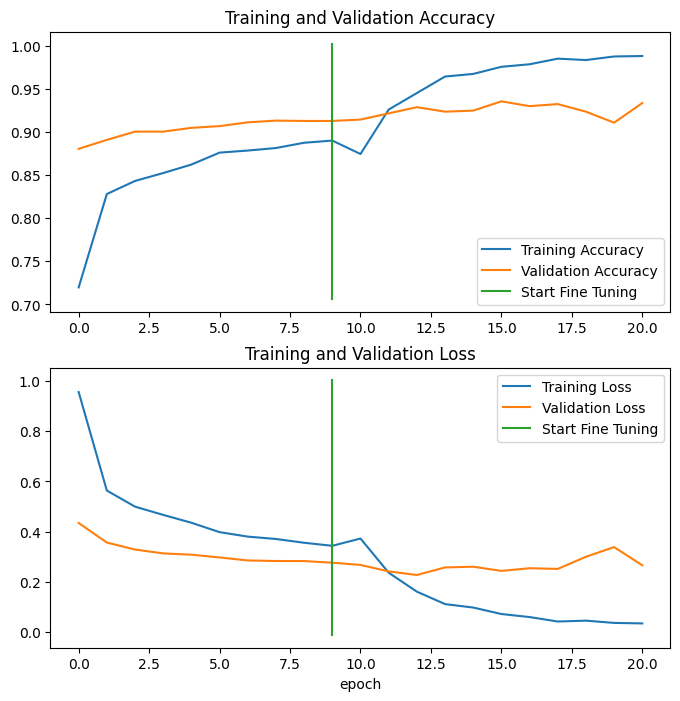

In [24]:
compare_historys(history_1,history_2)

In [25]:
pred_probs = model_1.predict(test_data)

79/79 [==============================] - 8s 85ms/step


In [26]:
# number of samples -> each class have 250 image, there are total of 10 classes
# so the length is 2500
len(pred_probs)

2500

In [27]:
pred_probs.shape

(2500, 10)

In [28]:
pred_probs[0], sum(pred_probs[0])

(array([9.9903750e-01, 1.5165942e-05, 7.7316358e-08, 1.1873319e-05,
        1.3513581e-10, 4.8012172e-10, 5.8167576e-10, 5.7083287e-04,
        3.6465703e-04, 4.5306697e-12], dtype=float32),
 1.0000001118689923)

In [29]:
print("Number of prediction probabilities ",len(pred_probs[1231]))
print("The class with highest prediction given by the model: ",(pred_probs[1231].argmax()))
print(test_data.class_names[(pred_probs[1231].argmax())])

Number of prediction probabilities  10
The class with highest prediction given by the model:  4
hamburger


In [30]:
# creating a pred class
pred_classes = pred_probs.argmax(axis=1)

# visalization
pred_classes[:100]

array([0, 7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
len(pred_classes)

2500

In [32]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [33]:
y_labels = []
for images , label in test_data.unbatch():
    y_labels.append(label.numpy().argmax())

y_labels[:100]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [34]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true= y_labels,
                                  y_pred = pred_classes)
sklearn_accuracy

0.934

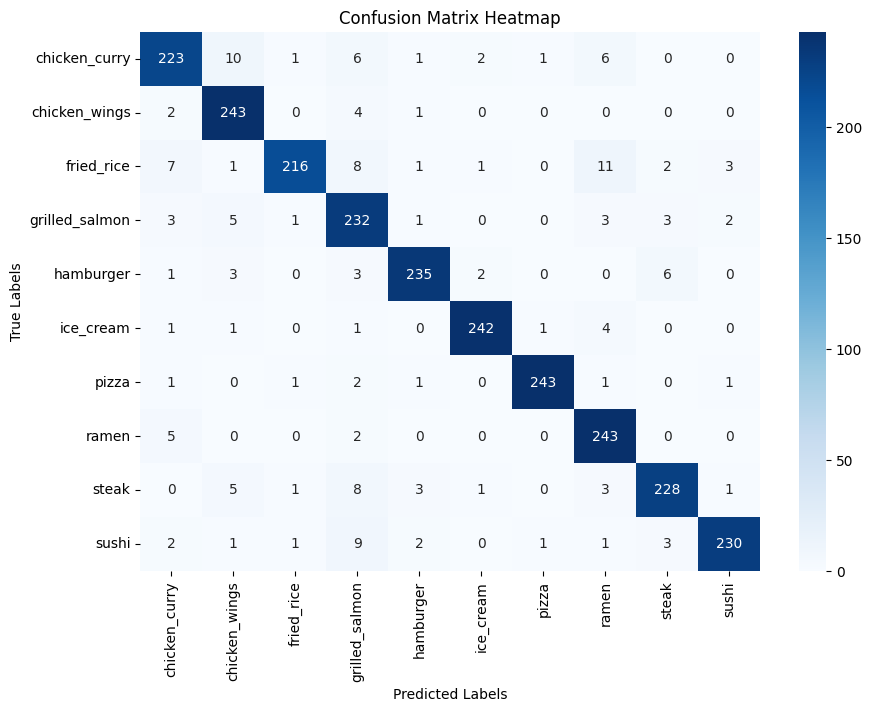

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


class_names = test_data.class_names


conf_matrix = confusion_matrix(y_labels, pred_classes)

# Create a seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred = pred_classes))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       250
           1       0.90      0.97      0.94       250
           2       0.98      0.86      0.92       250
           3       0.84      0.93      0.88       250
           4       0.96      0.94      0.95       250
           5       0.98      0.97      0.97       250
           6       0.99      0.97      0.98       250
           7       0.89      0.97      0.93       250
           8       0.94      0.91      0.93       250
           9       0.97      0.92      0.94       250

    accuracy                           0.93      2500
   macro avg       0.94      0.93      0.93      2500
weighted avg       0.94      0.93      0.93      2500



In [37]:
classification_report_dict = classification_report(y_true=y_labels,
                            y_pred = pred_classes , output_dict=True)
print(classification_report_dict)

{'0': {'precision': 0.9102040816326531, 'recall': 0.892, 'f1-score': 0.9010101010101009, 'support': 250}, '1': {'precision': 0.9033457249070632, 'recall': 0.972, 'f1-score': 0.9364161849710984, 'support': 250}, '2': {'precision': 0.9773755656108597, 'recall': 0.864, 'f1-score': 0.9171974522292994, 'support': 250}, '3': {'precision': 0.8436363636363636, 'recall': 0.928, 'f1-score': 0.8838095238095238, 'support': 250}, '4': {'precision': 0.9591836734693877, 'recall': 0.94, 'f1-score': 0.9494949494949495, 'support': 250}, '5': {'precision': 0.9758064516129032, 'recall': 0.968, 'f1-score': 0.9718875502008033, 'support': 250}, '6': {'precision': 0.9878048780487805, 'recall': 0.972, 'f1-score': 0.9798387096774194, 'support': 250}, '7': {'precision': 0.8933823529411765, 'recall': 0.972, 'f1-score': 0.9310344827586207, 'support': 250}, '8': {'precision': 0.9421487603305785, 'recall': 0.912, 'f1-score': 0.9268292682926831, 'support': 250}, '9': {'precision': 0.9704641350210971, 'recall': 0.92, 

In [38]:
class_f1_scores = {}
for k ,v in classification_report_dict.items():
    if k == "accuracy":
        break
    else:
        class_f1_scores[class_names[int(k)]] = v["f1-score"]

class_f1_scores

{'chicken_curry': 0.9010101010101009,
 'chicken_wings': 0.9364161849710984,
 'fried_rice': 0.9171974522292994,
 'grilled_salmon': 0.8838095238095238,
 'hamburger': 0.9494949494949495,
 'ice_cream': 0.9718875502008033,
 'pizza': 0.9798387096774194,
 'ramen': 0.9310344827586207,
 'steak': 0.9268292682926831,
 'sushi': 0.944558521560575}

In [39]:
f1_scores = pd.DataFrame({
    "class_names": list(class_f1_scores.keys()),
    "f1_score": list(class_f1_scores.values())
}).sort_values("f1_score", ascending=False)

# Display the DataFrame
print(f1_scores)

      class_names  f1_score
6           pizza  0.979839
5       ice_cream  0.971888
4       hamburger  0.949495
9           sushi  0.944559
1   chicken_wings  0.936416
7           ramen  0.931034
8           steak  0.926829
2      fried_rice  0.917197
0   chicken_curry  0.901010
3  grilled_salmon  0.883810


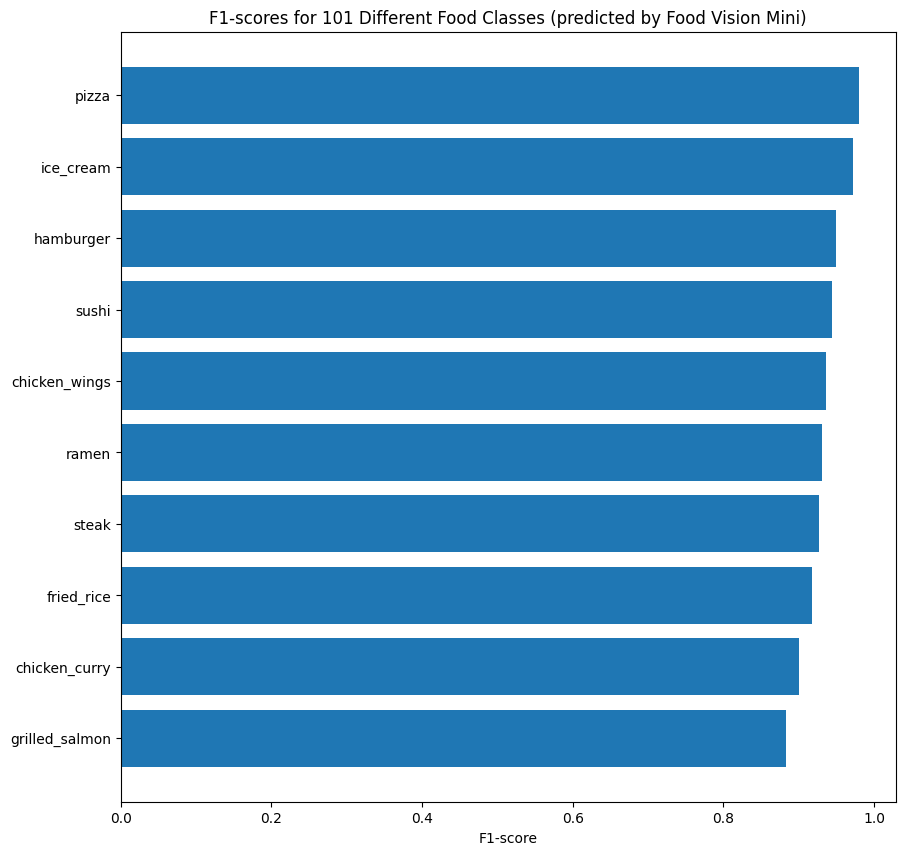

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))

scores = ax.barh(range(len(f1_scores)), f1_scores["f1_score"].values)

ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1-scores for 101 Different Food Classes (predicted by Food Vision Mini)")
ax.invert_yaxis()

plt.show()

In [41]:
def load_and_prep_image (filename, img_shape=224, scale=True):
    img = tf.io.read_file(filename)
    img = tf.io.decode_image(img,channels=3)
    img = tf.image.resize(img , [img_shape, img_shape])

    if scale :
        return img/255.
    else:
        return img # no need for EfficienetNet

1/1 [==============================] - 0s 24ms/step


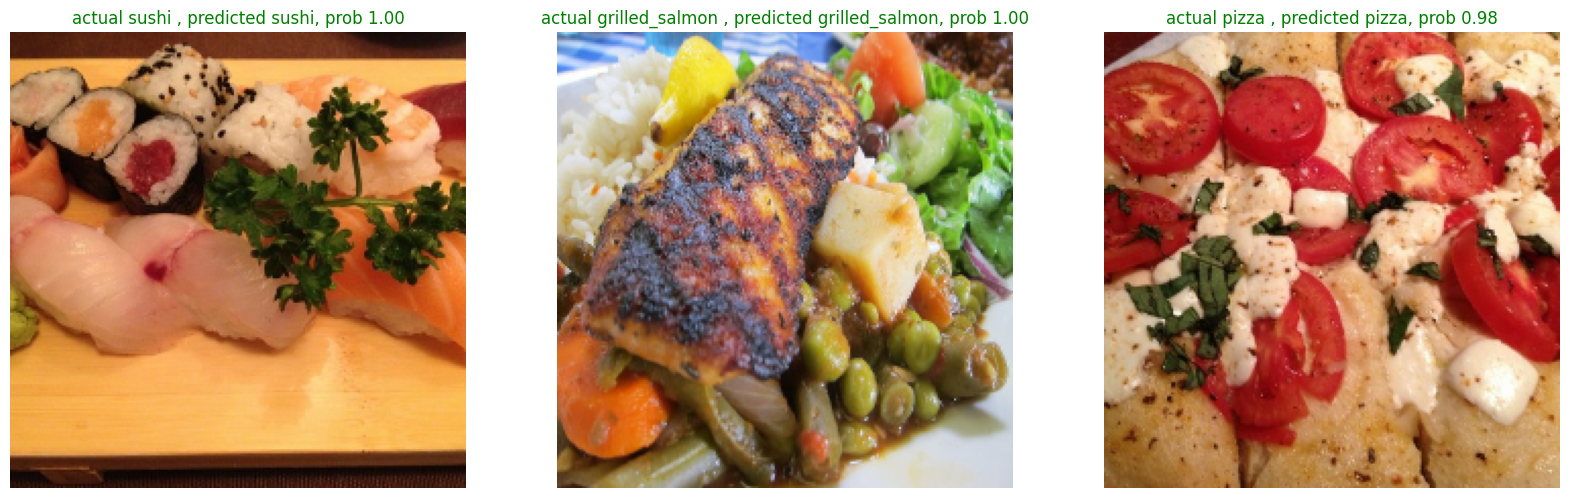

In [42]:
import os
import random

plt.figure(figsize=(20,20))
for i in range(3):
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(test_dir + "/" + class_name))
    filepath = test_dir + "/" + class_name + "/" + filename
    # print(filepath)

    # load the image and make predictions
    img = load_and_prep_image(filepath, scale=False)
    img_expanded = tf.expand_dims(img, axis=0)
    pred_prob = model_1.predict(img_expanded)
    pred_class = class_names[pred_prob.argmax()]
    # print(pred_class)

    #Plotting the image
    plt.subplot(1,3,i+1)
    plt.imshow(img/255.)
    if class_name == pred_class:
        title_color = 'g'
    else:
        title_color = 'r'
    plt.title(f"actual {class_name} , predicted {pred_class}, prob {pred_prob.max():.2f}",color=title_color)
    plt.axis(False)

In [43]:
model_1.evaluate(test_data)

79/79 [==============================] - 5s 66ms/step - loss: 0.2661 - accuracy: 0.9340


[0.26611143350601196, 0.9340000152587891]

In [44]:
filepaths = []
for filepath in test_data.file_paths:
    filepaths.append(filepath)



In [45]:
import pandas as pd


pred_df = pd.DataFrame({
    "img_path": filepaths,
    "y_true": y_labels,
    "y_pred": pred_classes,
    "pred_conf": pred_probs.max(axis=1),
    "y_true_classname": [class_names[i] for i in y_labels],
    "y_pred_classname": [class_names[i] for i in pred_classes]
})


pred_df.head()


,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,10_food_classes_all_data/test/chicken_curry/10...,0,0,0.999038,chicken_curry,chicken_curry
1,10_food_classes_all_data/test/chicken_curry/10...,0,7,0.723327,chicken_curry,ramen
2,10_food_classes_all_data/test/chicken_curry/10...,0,0,0.688007,chicken_curry,chicken_curry
3,10_food_classes_all_data/test/chicken_curry/10...,0,1,0.821323,chicken_curry,chicken_wings
4,10_food_classes_all_data/test/chicken_curry/10...,0,0,0.999991,chicken_curry,chicken_curry


In [46]:
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
print(pred_df.head())

                                            img_path  y_true  y_pred  \
0  10_food_classes_all_data/test/chicken_curry/10...       0       0   
1  10_food_classes_all_data/test/chicken_curry/10...       0       7   
2  10_food_classes_all_data/test/chicken_curry/10...       0       0   
3  10_food_classes_all_data/test/chicken_curry/10...       0       1   
4  10_food_classes_all_data/test/chicken_curry/10...       0       0   

   pred_conf y_true_classname y_pred_classname  pred_correct  
0   0.999038    chicken_curry    chicken_curry          True  
1   0.723327    chicken_curry            ramen         False  
2   0.688007    chicken_curry    chicken_curry          True  
3   0.821323    chicken_curry    chicken_wings         False  
4   0.999991    chicken_curry    chicken_curry          True  


In [47]:
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]

print(top_100_wrong.head(20))

                                               img_path  y_true  y_pred  \
951   10_food_classes_all_data/test/grilled_salmon/3...       3       8   
1602    10_food_classes_all_data/test/pizza/2508636.jpg       6       4   
322   10_food_classes_all_data/test/chicken_wings/20...       1       3   
55    10_food_classes_all_data/test/chicken_curry/16...       0       1   
1039  10_food_classes_all_data/test/hamburger/161175...       4       8   
1158  10_food_classes_all_data/test/hamburger/351506...       4       8   
2463     10_food_classes_all_data/test/sushi/684266.jpg       9       8   
2431     10_food_classes_all_data/test/sushi/399473.jpg       9       0   
2080    10_food_classes_all_data/test/steak/2276476.jpg       8       3   
782   10_food_classes_all_data/test/grilled_salmon/1...       3       7   
44    10_food_classes_all_data/test/chicken_curry/15...       0       2   
822   10_food_classes_all_data/test/grilled_salmon/2...       3       7   
2333    10_food_classes_a

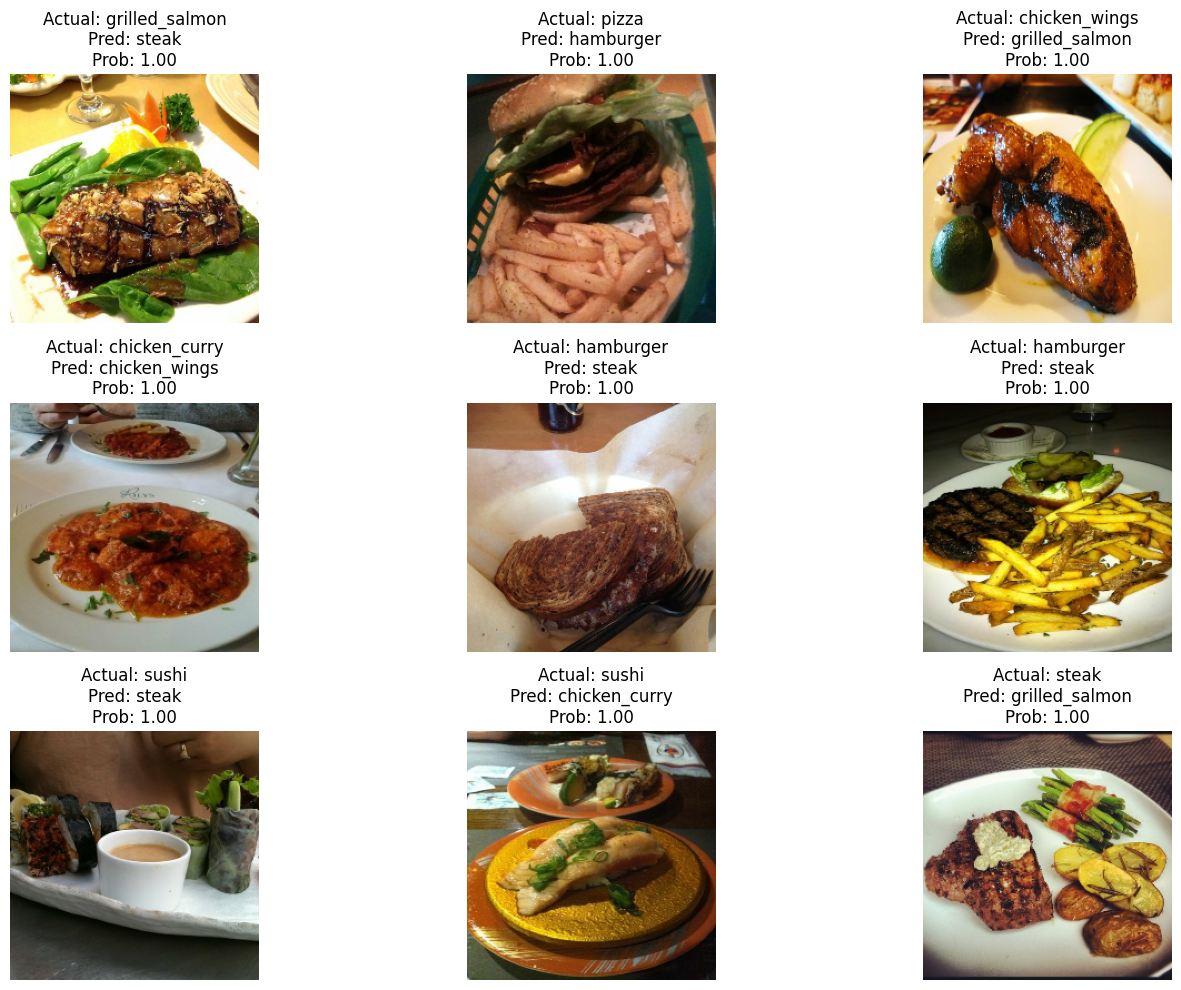

In [48]:
import matplotlib.pyplot as plt


images_to_view = 9
start_index = 0

plt.figure(figsize=(15, 10))

for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
    plt.subplot(3, 3, i+1)

    img = load_and_prep_image(row.img_path, scale=False)

    # Extract the required row parameters
    pred_prob = row.pred_conf
    y_true_classname = row.y_true_classname
    y_pred_classname = row.y_pred_classname

    # Display the image
    plt.imshow(img/255.)
    plt.title(f"Actual: {y_true_classname}\nPred: {y_pred_classname}\nProb: {pred_prob:.2f}")
    plt.axis(False)

plt.tight_layout()
plt.show()


In [49]:
model_1.save("fine_tuned.keras")